# FGS Commissioning Tool WFR Testing

This template will walk through the tools for testing ITM images in the lead up to the March 2018 WFR. 

Note: *For a more detailed walkthrough of these tools, see the FGS Commissioning Tools Tutorial notebook.*

In [5]:
import os
from glob import glob

import matplotlib
if matplotlib.get_backend() != 'Qt5Agg':
    matplotlib.use('Qt5Agg')  # Make sure that we are using Qt5
from astropy.io import fits
from astropy.io import ascii as asc
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# Establish paths
current_dir = os.getcwd()
package_dir = os.path.split(current_dir)[0]
data_dir = '/itar/jwst/tel/ITM Simulations/'

/Users/lchambers/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [19]:
from jwst_fgs_commissioning_tools import run_fgs_commissioning_tool
from jwst_fgs_commissioning_tools.fsw_file_writer import rewrite_prc
from jwst_fgs_commissioning_tools.segment_guiding import segment_guiding

/Users/lchambers/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Tutorial Table of Contents:
* [Run through tools](#comm_tools)
     * [Image 1](#imarr1_image1)
     * [Image 2](#imarr1_image2)
* Segment guiding
* Re-writing PRC files 
    
***

<font color='3297F0'>**IMPORTANT**</font>

For the following steps set the **`smoothing`** flag to **'high'**:

* Image Array
* Global Alignment

***

<a id='comm_tools'></a>
## Commissioning step: Image Array 1

<a id='imarr1_image1'></a>
### Image Name: `Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits`

<font color='ED9E33'>**WARNING:**</font> The following two cells need to be updated

In [7]:
# Path to data (from `data_dir`)
data_name = 'Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits' 
# Name of the out directory - group name
outdir_name = 'imarr1'
# If there is a directory under the group, use this to add another variable to your outname
sequence = 'seq01_' 
# The prefex to the fileout name - will be followed by input image name
outname_prefix = '{}_{}MM'.format(outdir_name, sequence)

In [8]:
NC = True
nircam_mod = None # default
fgs_counts = None # default
jmag = None # default
smooth_GA = 'high' # default
bkgd_stars = False # default
in_file = None # default

In [11]:
# Just run this cell (no need to change any code)

input_image = os.path.join(data_dir, data_name)
guider = 1
root = '{}_{}'.format(outname_prefix, data_name.split('/')[-1].split('.')[0])
out_dir = '/itar/csa/wit/fgs/fgses/WFRTests/feb2018/{}'.format(outdir_name)

**Note:**
When running the GUI in Jupyter Notebooks, sometimes the notebook doesn't wait for user input from the GUI, and as a result, the following function call will fail. If this happens, just call the line again. Do not despair - this never happens when running the tool in IPython! (See [here](#ipython) for brief instructions on how to use the tools in IPython)

In [12]:
# Just run this cell (no need to change any code)

# Take care of matplotlib backend business
%matplotlib qt5
plt.close('all')

run_fgs_commissioning_tool.run_all(input_image, guider, root=root, nircam=NC, out_dir=out_dir,
                                  fgs_counts=fgs_counts, jmag=jmag, smoothing=smooth_GA, bkgd_stars=bkgd_stars, 
                                  in_file=in_file)

2018-02-22 20:16:43,085 INFO     Started logging to /Users/lchambers/TEL/Commissioning/Tools/fgs-commissioning/logs/2018_02_22_Thu_201643_run_all_imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img.log
2018-02-22 20:16:43,093 INFO     Package directory: /Users/lchambers/TEL/Commissioning/Tools/fgs-commissioning/jwst_fgs_commissioning_tools
2018-02-22 20:16:43,095 INFO     Processing request for imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img. 
All data will be saved in: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img
2018-02-22 20:16:43,097 INFO     Input image: /itar/jwst/tel/ITM Simulations/Melendez/Image Array 1/jw00172_005_001_01100_00000_NRCA3_img.fits
2018-02-22 20:16:43,100 WARNING  Image Conversion: No counts or J magnitude given, setting to default
2018-02-22 20:16:43,102 INFO     Image Conversion: J magnitude = 11.0, FGS counts = 14779147.9
2018-02-22 20:16:43,105 INFO     Image Conversion: Beginning image conversion to guid

Successfully wrote: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/dhas/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_TRK.fits
Successfully wrote: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/ground_system/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_TRK.dat
2018-02-22 20:18:25,123 INFO     FSW File Writing: Max of input image: 5022
2018-02-22 20:18:25,125 INFO     FSW File Writing: Using /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_regfile.txt as the reg file
Successfully wrote: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/stsci/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_LOSTRKsky.fits
Successfully wrote: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/stsci/imarr1_s

### Inspect Output

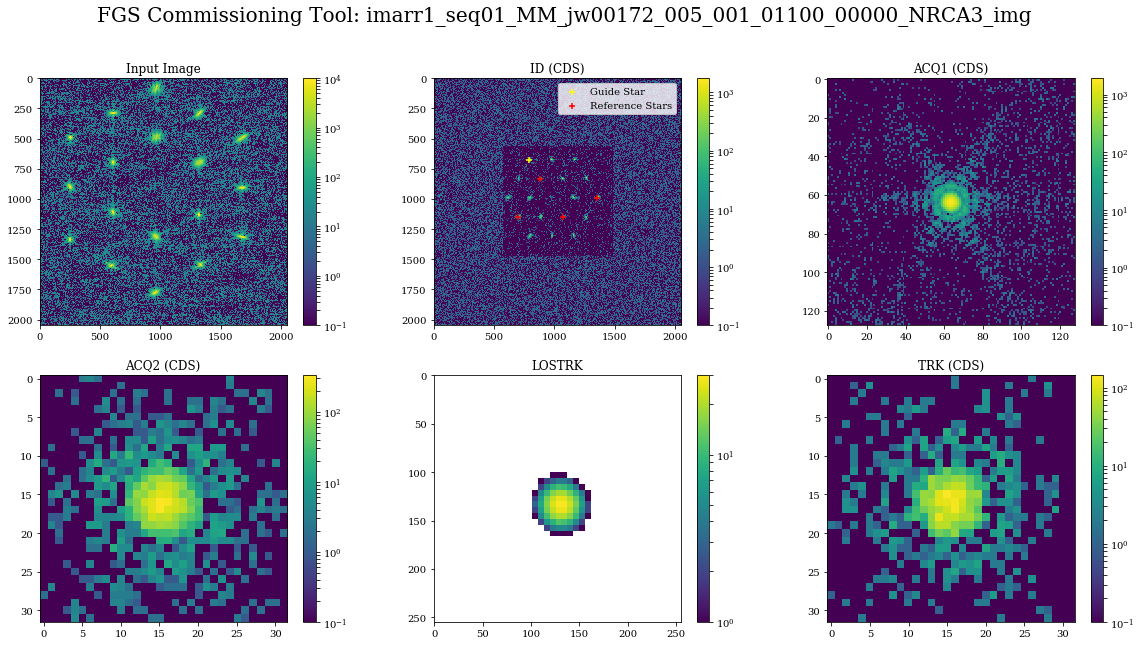

In [13]:
# Just run this cell (no need to change any code)

%matplotlib inline
out_file_dir = os.path.join(out_dir, 'out', root)

# View the final FGS images
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('FGS Commissioning Tool: {}'.format(root), fontsize=20)

in_data = fits.getdata(input_image)
in_data[in_data <= 0] = 0.1
implot = ax1.imshow(in_data, norm=LogNorm(), clim=(1e-1, 1e4))
plt.colorbar(implot, ax=ax1)
ax1.set_title('Input Image')

id_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*IDcds.fits'))[0])[0]
id_data[id_data <= 0] = 0.1
implot = ax2.imshow(id_data, norm=LogNorm())
plt.colorbar(implot, ax=ax2)
regfile = glob(out_file_dir + '/*regfile.txt')[0]
coords = asc.read(regfile)
ax2.scatter(coords['x'][0], coords['y'][0], marker = '+', c= 'yellow', label='Guide Star')
ax2.scatter(coords['x'][1:], coords['y'][1:], marker = '+', c= 'r', label='Reference Stars')
ax2.legend()
ax2.set_title('ID (CDS)')

acq1_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*ACQ1cds.fits'))[0])[0]
acq1_data[acq1_data <= 0] = 0.1
implot = ax3.imshow(acq1_data, norm=LogNorm())
plt.colorbar(implot, ax=ax3)
ax3.set_title('ACQ1 (CDS)')

acq2_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*ACQ2cds.fits'))[0])[0]
acq2_data[acq2_data <= 0] = 0.1
implot = ax4.imshow(acq2_data, norm=LogNorm())
plt.colorbar(implot, ax=ax4)
ax4.set_title('ACQ2 (CDS)')

lostrk_data = fits.getdata(glob(os.path.join(out_file_dir, 'dhas', '*LOSTRK.fits'))[0])
implot = ax5.imshow(lostrk_data, norm=LogNorm())
plt.colorbar(implot, ax=ax5)
ax5.set_title('LOSTRK')

trk_data = fits.getdata(glob(os.path.join(out_file_dir, 'dhas' ,'*_TRK.fits'))[0]).astype(float)
trk_data_cds = trk_data[1] - trk_data[0]
trk_data_cds[trk_data_cds <= 0] = 0.1
implot = ax6.imshow(trk_data_cds, norm=LogNorm())
plt.colorbar(implot, ax=ax6)
ax6.set_title('TRK (CDS)')

plt.show()

#### Next steps: 
1. Take screenshots of the Input Image and the ID output and upload them into the testing table (https://confluence.stsci.edu/display/INSTEL/March+WFR+Testing). 
2. Run the ID images through the DHAS.
    1. If the DHAS is unsuccessful, use the code below to re-write the `ID.prc` and the `regfile.txt` file with different commanded stars. Take another screenshot of the ID output to document the newly commanded stars, saving the screenshot into the output directory. Re-run through the DHAS, and repeat as necessary.
3. Run the segment guiding tool on the orientation that successfully ran through DHAS (code below).

### If necessary: Rewrite `ID.prc` and `regfile.txt`

Use the following naming conventions to command segments:

<table><tr><td><img src="JWSTgrid.png" style="width: 400px;"></td><td><img src="JWSTgrid_side.png" style="width: 400px;"></td></tr></table>

In [28]:
new_command = 'AQGMJ' # <-- change this to determine which segments will be chosen as guide and reference stars
                      # (per convention, the first letter/segment will be the guide star, with all subsequent
                      # letters/segments being the reference stars)

Reading from (and writing to) /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img
Threshold: 0.9
Number of reference stars: 4
Successfully wrote: imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_ID.prc
Successfully wrote: /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_regfile.txt


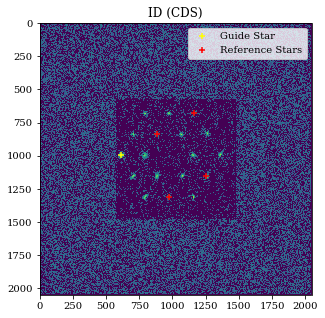

In [30]:
# Just run this cell (no need to change any code)

rewrite_prc.rewrite_prc(new_command, guider, root, out_file_dir)

# Plot the ID image with the new commanded stars
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
id_data = fits.getdata(glob(os.path.join(out_file_dir, 'stsci', '*IDcds.fits'))[0])[0]
id_data[id_data <= 0] = 0.1
implot = ax1.imshow(id_data, norm=LogNorm())
plt.colorbar(implot, ax=ax2)
regfile = glob(out_file_dir + '/*regfile.txt')[0]
coords = asc.read(regfile)
ax1.scatter(coords['x'][0], coords['y'][0], marker = '+', c= 'yellow', label='Guide Star')
ax1.scatter(coords['x'][1:], coords['y'][1:], marker = '+', c= 'r', label='Reference Stars')
ax1.legend()
ax1.set_title('ID (CDS)')
plt.show()

### Segment Guiding

In [23]:
# Just run this cell (no need to change any code)

# Dummy parameters
GS_params_dict = {'V2Boff': 0.1,  # V2 boresight offset
                  'V3Boff': 0.2,  # V3 boresight offset
                  'fgsNum': 1,  # guider number
                  'RA': 30.,  # RA of guide star
                  'Dec': 50.,  # Dec of guide star
                  'PA': 2.,  # position angle of guide star
                  'segNum': 0}  # selected segment to guide on

# Pointing to necessary files to run (already created by previous steps)
segment_infile = os.path.join(out_file_dir, '{}_G{}_ALLpsfs.txt'.format(root, guider))
selected_segs = os.path.join(out_file_dir, '{}_G{}_regfile.txt'.format(root, guider))

Reading all GS parameters from user-provided dictionary.
Segment coordinates read from /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_ALLpsfs.txt
18 Segments in input file.
Selected segment coordinates read from /Users/lchambers/Desktop/WFR_test/out/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img/imarr1_seq01_MM_jw00172_005_001_01100_00000_NRCA3_img_G1_regfile.txt

Summary
Aperture FGS 1
V2Ref   207.1900 V3Ref  -697.5000 arc-sec IdlAngle    -1.2508 degrees
Used segment 0
Boresight offset 0.1 0.2 arc-sec
Guide star at RA 30.0  Dec 50.0 degrees
Position angle 2.0 degrees

Segment     dV2    dV3    xIdl   yIdl     RA         Dec         xDet     yDet
    1    -23.69   3.89  -23.60   4.40   29.990648  50.000306    679.00   971.00
    2    -23.37  -9.63  -23.58  -9.11   29.990583  49.996552    680.00  1164.00
    3    -23.78  16.42  -23.42  16.94   29.990797  50.003788    681.00   791

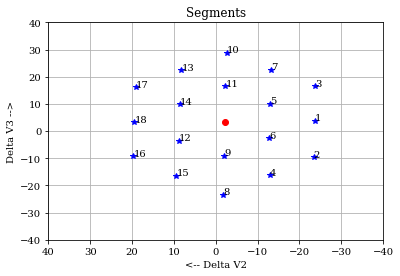

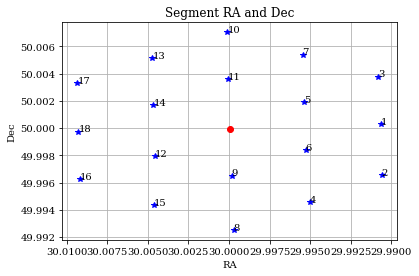

In [22]:
# Just run this cell (no need to change any code)

# Get GS override file with segment selection
segment_guiding.run_tool(segment_infile, 
                         selected_segs=selected_segs,
                         GS_params_dict=GS_params_dict,
                         out_dir=out_dir)

***

<a id='imarr1_image2'></a>
### Image Name: ``